In [49]:
import pandas as pd
import numpy as np

In [50]:
ap_data = pd.read_excel("exact_data_910_log_7.xlsx")
ap_data = ap_data.drop('datetime',axis = 1)

In [51]:
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
date       121 non-null datetime64[ns]
all_num    121 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.0 KB


In [52]:
ap_data.reset_index(inplace=True, drop=True)
ap_data.head(-1)

,date,all_num
0,2019-09-20 00:00:00,1
1,2019-09-20 01:00:00,0
2,2019-09-20 02:00:00,0
3,2019-09-20 03:00:00,0
4,2019-09-20 04:00:00,0
5,2019-09-20 05:00:00,0
6,2019-09-20 06:00:00,0
7,2019-09-20 07:00:00,4
8,2019-09-20 08:00:00,9
9,2019-09-20 09:00:00,18


In [53]:
air_data = pd.read_excel("air910.xlsx")

In [54]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
timestamp(Asia/Seoul)    121 non-null datetime64[ns]
temp(°C)                 121 non-null float64
humid                    121 non-null float64
co2                      121 non-null float64
voc                      121 non-null float64
pm25                     121 non-null float64
light                    121 non-null float64
noise                    121 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 7.7 KB


In [55]:
air_data.reset_index(inplace=True, drop=True)
air_data.head(-1)

,timestamp(Asia/Seoul),temp(°C),humid,co2,voc,pm25,light,noise
0,2019-09-29 16:00:00,26.9000,42.3500,4361.7000,485.8750,2.5000,381.0250,53.3500
1,2019-09-29 17:00:00,26.5125,43.4000,4554.1125,520.4750,2.4875,370.4750,53.0750
2,2019-09-29 18:00:00,26.3000,46.5750,4860.2500,670.1000,2.6875,362.0625,52.5750
3,2019-09-29 19:00:00,26.6000,45.0625,4892.9250,665.1750,3.2250,361.7250,53.0250
4,2019-09-29 20:00:00,26.5750,43.0625,4923.3750,665.5125,2.9500,364.5250,52.9875
5,2019-09-29 21:00:00,26.4000,41.3250,4781.2500,613.8750,2.5625,366.5250,52.6750
6,2019-09-29 22:00:00,26.2125,42.5000,4547.4375,603.1125,2.9250,243.7250,51.3750
7,2019-09-29 23:00:00,26.1500,43.0500,4298.8750,566.7000,3.2750,174.5375,50.9000
8,2019-09-30 00:00:00,26.3000,46.0500,3617.9375,508.6250,3.6500,31.1625,50.2375
9,2019-09-30 01:00:00,26.1250,49.1375,2542.1875,413.3875,4.6625,91.1375,51.0375


In [56]:
#파일 불러오기
real_air = pd.read_csv('용봉동2026.csv', engine='python')

In [57]:
real_air = real_air[:120]

In [58]:
real_air.reset_index(inplace=True, drop=True)
real_air.head(-1)

,day,time,humid,rain?,temp,windpower
0,20,0,67,0,20.900000,0.7
1,20,100,64,0,22.100000,0.8
2,20,200,62,0,22.500000,0.2
3,20,300,55,0,24.100000,1.4
4,20,400,51,0,24.500000,2.7
5,20,500,48,0,24.600000,3.9
6,20,600,52,0,23.600000,4.0
7,20,700,53,0,23.200001,3.3
8,20,800,58,0,22.500000,3.0
9,20,900,63,0,21.700001,3.6


In [59]:
result = pd.concat([ap_data,air_data,real_air], axis = 1)

In [60]:
result = result.drop(['day', 'time', 'timestamp(Asia/Seoul)'], axis = 1)

In [61]:
result

,date,all_num,temp(°C),humid,co2,voc,pm25,light,noise,humid,rain?,temp,windpower
0,2019-09-20 00:00:00,1,26.9000,42.3500,4361.7000,485.8750,2.5000,381.0250,53.3500,67.0,0.0,20.900000,0.7
1,2019-09-20 01:00:00,0,26.5125,43.4000,4554.1125,520.4750,2.4875,370.4750,53.0750,64.0,0.0,22.100000,0.8
2,2019-09-20 02:00:00,0,26.3000,46.5750,4860.2500,670.1000,2.6875,362.0625,52.5750,62.0,0.0,22.500000,0.2
3,2019-09-20 03:00:00,0,26.6000,45.0625,4892.9250,665.1750,3.2250,361.7250,53.0250,55.0,0.0,24.100000,1.4
4,2019-09-20 04:00:00,0,26.5750,43.0625,4923.3750,665.5125,2.9500,364.5250,52.9875,51.0,0.0,24.500000,2.7
5,2019-09-20 05:00:00,0,26.4000,41.3250,4781.2500,613.8750,2.5625,366.5250,52.6750,48.0,0.0,24.600000,3.9
6,2019-09-20 06:00:00,0,26.2125,42.5000,4547.4375,603.1125,2.9250,243.7250,51.3750,52.0,0.0,23.600000,4.0
7,2019-09-20 07:00:00,4,26.1500,43.0500,4298.8750,566.7000,3.2750,174.5375,50.9000,53.0,0.0,23.200001,3.3
8,2019-09-20 08:00:00,9,26.3000,46.0500,3617.9375,508.6250,3.6500,31.1625,50.2375,58.0,0.0,22.500000,3.0
9,2019-09-20 09:00:00,18,26.1250,49.1375,2542.1875,413.3875,4.6625,91.1375,51.0375,63.0,0.0,21.700001,3.6


In [62]:
result['date_day'] = result['date'].dt.day
result['date_hour'] = result['date'].dt.hour
result['date_minute'] = result['date'].dt.minute
result['date_weekday'] = result['date'].dt.dayofweek

In [63]:
result

,date,all_num,temp(°C),humid,co2,voc,pm25,light,noise,humid,rain?,temp,windpower,date_day,date_hour,date_minute,date_weekday
0,2019-09-20 00:00:00,1,26.9000,42.3500,4361.7000,485.8750,2.5000,381.0250,53.3500,67.0,0.0,20.900000,0.7,20,0,0,4
1,2019-09-20 01:00:00,0,26.5125,43.4000,4554.1125,520.4750,2.4875,370.4750,53.0750,64.0,0.0,22.100000,0.8,20,1,0,4
2,2019-09-20 02:00:00,0,26.3000,46.5750,4860.2500,670.1000,2.6875,362.0625,52.5750,62.0,0.0,22.500000,0.2,20,2,0,4
3,2019-09-20 03:00:00,0,26.6000,45.0625,4892.9250,665.1750,3.2250,361.7250,53.0250,55.0,0.0,24.100000,1.4,20,3,0,4
4,2019-09-20 04:00:00,0,26.5750,43.0625,4923.3750,665.5125,2.9500,364.5250,52.9875,51.0,0.0,24.500000,2.7,20,4,0,4
5,2019-09-20 05:00:00,0,26.4000,41.3250,4781.2500,613.8750,2.5625,366.5250,52.6750,48.0,0.0,24.600000,3.9,20,5,0,4
6,2019-09-20 06:00:00,0,26.2125,42.5000,4547.4375,603.1125,2.9250,243.7250,51.3750,52.0,0.0,23.600000,4.0,20,6,0,4
7,2019-09-20 07:00:00,4,26.1500,43.0500,4298.8750,566.7000,3.2750,174.5375,50.9000,53.0,0.0,23.200001,3.3,20,7,0,4
8,2019-09-20 08:00:00,9,26.3000,46.0500,3617.9375,508.6250,3.6500,31.1625,50.2375,58.0,0.0,22.500000,3.0,20,8,0,4
9,2019-09-20 09:00:00,18,26.1250,49.1375,2542.1875,413.3875,4.6625,91.1375,51.0375,63.0,0.0,21.700001,3.6,20,9,0,4


In [64]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 17 columns):
date            121 non-null datetime64[ns]
all_num         121 non-null int64
temp(°C)        121 non-null float64
humid           121 non-null float64
co2             121 non-null float64
voc             121 non-null float64
pm25            121 non-null float64
light           121 non-null float64
noise           121 non-null float64
humid           120 non-null float64
rain?           120 non-null float64
temp            120 non-null float64
windpower       120 non-null float64
date_day        121 non-null int64
date_hour       121 non-null int64
date_minute     121 non-null int64
date_weekday    121 non-null int64
dtypes: datetime64[ns](1), float64(11), int64(5)
memory usage: 16.2 KB


In [65]:
result = result.drop('date', axis = 1)

In [66]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 16 columns):
all_num         121 non-null int64
temp(°C)        121 non-null float64
humid           121 non-null float64
co2             121 non-null float64
voc             121 non-null float64
pm25            121 non-null float64
light           121 non-null float64
noise           121 non-null float64
humid           120 non-null float64
rain?           120 non-null float64
temp            120 non-null float64
windpower       120 non-null float64
date_day        121 non-null int64
date_hour       121 non-null int64
date_minute     121 non-null int64
date_weekday    121 non-null int64
dtypes: float64(11), int64(5)
memory usage: 15.2 KB


In [67]:
result.shape


(121, 16)

In [68]:
result

,all_num,temp(°C),humid,co2,voc,pm25,light,noise,humid,rain?,temp,windpower,date_day,date_hour,date_minute,date_weekday
0,1,26.9000,42.3500,4361.7000,485.8750,2.5000,381.0250,53.3500,67.0,0.0,20.900000,0.7,20,0,0,4
1,0,26.5125,43.4000,4554.1125,520.4750,2.4875,370.4750,53.0750,64.0,0.0,22.100000,0.8,20,1,0,4
2,0,26.3000,46.5750,4860.2500,670.1000,2.6875,362.0625,52.5750,62.0,0.0,22.500000,0.2,20,2,0,4
3,0,26.6000,45.0625,4892.9250,665.1750,3.2250,361.7250,53.0250,55.0,0.0,24.100000,1.4,20,3,0,4
4,0,26.5750,43.0625,4923.3750,665.5125,2.9500,364.5250,52.9875,51.0,0.0,24.500000,2.7,20,4,0,4
5,0,26.4000,41.3250,4781.2500,613.8750,2.5625,366.5250,52.6750,48.0,0.0,24.600000,3.9,20,5,0,4
6,0,26.2125,42.5000,4547.4375,603.1125,2.9250,243.7250,51.3750,52.0,0.0,23.600000,4.0,20,6,0,4
7,4,26.1500,43.0500,4298.8750,566.7000,3.2750,174.5375,50.9000,53.0,0.0,23.200001,3.3,20,7,0,4
8,9,26.3000,46.0500,3617.9375,508.6250,3.6500,31.1625,50.2375,58.0,0.0,22.500000,3.0,20,8,0,4
9,18,26.1250,49.1375,2542.1875,413.3875,4.6625,91.1375,51.0375,63.0,0.0,21.700001,3.6,20,9,0,4


In [69]:
result.corr()

,all_num,temp(°C),humid,co2,voc,pm25,light,noise,humid,rain?,temp,windpower,date_day,date_hour,date_minute,date_weekday
all_num,1.000000,-0.204288,0.224431,-0.625715,-0.592820,0.404102,0.177544,-0.027544,0.344823,-0.051293,-0.516189,-0.246732,-0.018435,0.577646,NaN,-0.275070
temp(°C),-0.204288,1.000000,-0.825411,0.679056,0.662115,0.379060,0.227905,0.294343,-0.025648,0.172343,0.142756,0.048942,-0.304373,-0.107829,NaN,0.076885
humid,0.224431,-0.825411,1.000000,-0.689235,-0.673592,-0.468520,-0.120802,-0.268180,0.113252,-0.154822,-0.241145,0.070622,0.333005,0.258473,NaN,0.003527
co2,-0.625715,0.679056,-0.689235,1.000000,0.969627,0.021470,0.063496,0.291925,-0.261606,0.168724,0.477237,0.200429,-0.144670,-0.534174,NaN,0.097271
voc,-0.592820,0.662115,-0.673592,0.969627,1.000000,0.024859,0.024797,0.207322,-0.271014,0.204438,0.484900,0.281845,-0.209132,-0.554454,NaN,0.144945
pm25,0.404102,0.379060,-0.468520,0.021470,0.024859,1.000000,0.044909,0.072307,-0.112339,-0.064833,0.095912,-0.228437,-0.274193,0.055168,NaN,-0.104026
light,0.177544,0.227905,-0.120802,0.063496,0.024797,0.044909,1.000000,0.845475,0.308840,0.003934,-0.328505,-0.252771,0.115693,0.310842,NaN,-0.194055
noise,-0.027544,0.294343,-0.268180,0.291925,0.207322,0.072307,0.845475,1.000000,0.255212,0.089469,-0.204523,-0.198651,0.011951,0.129698,NaN,-0.086996
humid,0.344823,-0.025648,0.113252,-0.261606,-0.271014,-0.112339,0.308840,0.255212,1.000000,0.551490,-0.931637,0.145032,-0.086189,0.484516,NaN,0.258627
rain?,-0.051293,0.172343,-0.154822,0.168724,0.204438,-0.064833,0.003934,0.089469,0.551490,1.000000,-0.332051,0.478295,-0.394640,-0.002780,NaN,0.457192


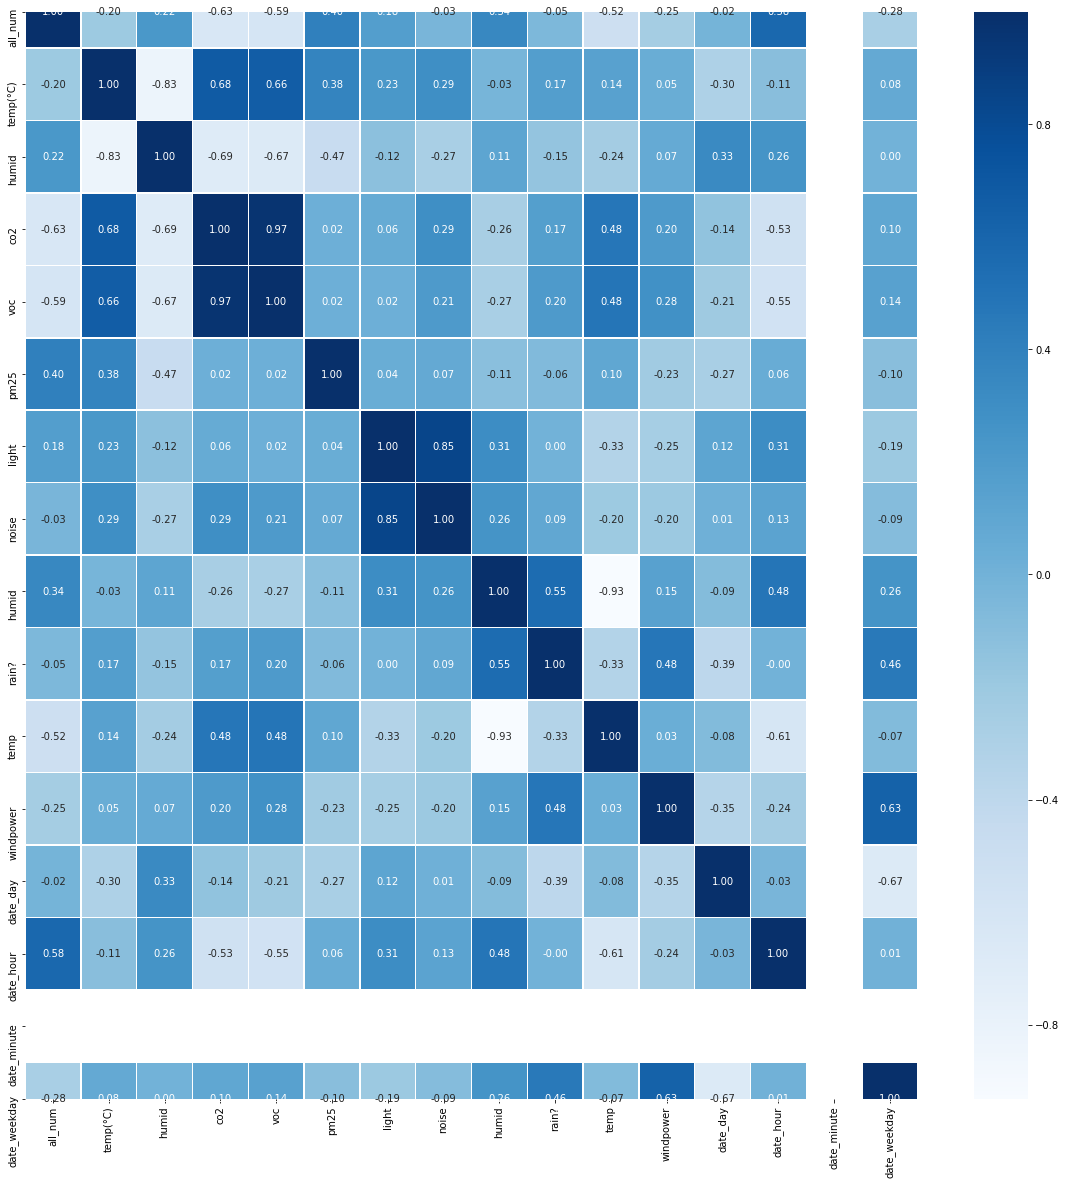

In [70]:
#https://wikidocs.net/45481
#https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D
#https://gomguard.tistory.com/173

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,20))
sns.heatmap(data = result.corr(), annot=True,
fmt = '.2f', linewidths = .5, cmap = 'Blues')

In [71]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import tensorflow as tf

In [72]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [73]:
dataset = result.values
X = dataset[:, 0:16]
Y_obj = dataset[:, 0]

In [74]:
print(X)


[[ 1.     26.9    42.35   ...  0.      0.      4.    ]
 [ 0.     26.5125 43.4    ...  1.      0.      4.    ]
 [ 0.     26.3    46.575  ...  2.      0.      4.    ]
 ...
 [19.     26.     48.0125 ... 22.      0.      1.    ]
 [15.     26.25   46.95   ... 23.      0.      1.    ]
 [ 0.     25.725  49.1    ...  0.      0.      2.    ]]


In [75]:
print(Y_obj)

[ 1.  0.  0.  0.  0.  0.  0.  4.  9. 18. 24. 28. 23. 31. 33. 40. 29. 30.
 20. 16. 12. 18. 14.  6.  2.  0.  0.  0.  0.  0.  0.  5.  6. 10. 11. 13.
 14. 15. 26. 30. 35. 22. 21. 13. 16. 14.  8.  6.  2.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  2.  4.  3.  5. 11.  9.  9.  3.  4.  8.  4.  6.  4.
  0.  0.  0.  0.  0.  0.  0.  9.  8. 18. 13. 10. 16. 25. 30. 35. 47. 43.
 24. 20. 23. 24. 17.  9.  2.  0.  0.  0.  0.  0.  2.  4. 14. 18. 16. 17.
 16. 18. 17. 23. 25. 16. 15. 16. 19. 31. 19. 15.  0.]


In [76]:
# 문자열 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [77]:
# # 모델 설정
# model = Sequential()
# model.add(Dense(24, input_dim = 16, activation='relu')) 
# model.add(Dense(10, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# # 모델 컴파일
# model.compile(loss='mean_squared_error',
#               optimizer='adam',
#               metrics=['accuracy'])
# look_back = 20

# model = Sequential()
# model.add(LSTM(32, batch_input_shape=(16, look_back, 1), stateful=True))
# model.add(Dropout(0.3))
# model.add(Dense(1))

# # 3. 모델 학습과정 설정하기
# model.compile(loss='mean_squared_error', optimizer='adam')


# 모델 학습
model.fit(X, Y,
          batch_size= 10, # 한번에 처리할 데이터 수
          epochs= 500) # 학습 횟수

# 결과 출력
print('\n Accuracy : %.4f' % (model.evaluate(X, Y)[1]))

Epoch 1/500
121/121 [==============================] - 0s 173us/step - loss: nan - acc: 0.0496
Epoch 2/500
121/121 [==============================] - 0s 189us/step - loss: nan - acc: 0.0000e+00
Epoch 3/500
121/121 [==============================] - 0s 157us/step - loss: nan - acc: 0.0000e+00
Epoch 4/500
121/121 [==============================] - 0s 379us/step - loss: nan - acc: 0.0000e+00
Epoch 5/500
121/121 [==============================] - 0s 157us/step - loss: nan - acc: 0.0000e+00
Epoch 6/500
121/121 [==============================] - 0s 165us/step - loss: nan - acc: 0.0000e+00
Epoch 7/500
121/121 [==============================] - 0s 148us/step - loss: nan - acc: 0.0000e+00
Epoch 8/500
121/121 [==============================] - 0s 148us/step - loss: nan - acc: 0.0000e+00
Epoch 9/500
121/121 [==============================] - 0s 132us/step - loss: nan - acc: 0.0000e+00
Epoch 10/500
121/121 [==============================] - 0s 132us/step - loss: nan - acc: 0.0000e+00
Epoch 11/500


121/121 [==============================] - 0s 140us/step - loss: nan - acc: 0.0000e+00
Epoch 84/500
121/121 [==============================] - 0s 124us/step - loss: nan - acc: 0.0000e+00
Epoch 85/500
121/121 [==============================] - 0s 148us/step - loss: nan - acc: 0.0000e+00
Epoch 86/500
121/121 [==============================] - 0s 132us/step - loss: nan - acc: 0.0000e+00
Epoch 87/500
121/121 [==============================] - 0s 148us/step - loss: nan - acc: 0.0000e+00
Epoch 88/500
121/121 [==============================] - 0s 140us/step - loss: nan - acc: 0.0000e+00
Epoch 89/500
121/121 [==============================] - 0s 173us/step - loss: nan - acc: 0.0000e+00
Epoch 90/500
121/121 [==============================] - 0s 132us/step - loss: nan - acc: 0.0000e+00
Epoch 91/500
121/121 [==============================] - 0s 157us/step - loss: nan - acc: 0.0000e+00
Epoch 92/500
121/121 [==============================] - 0s 140us/step - loss: nan - acc: 0.0000e+00
Epoch 93/500


121/121 [==============================] - 0s 165us/step - loss: nan - acc: 0.0000e+00
Epoch 165/500
121/121 [==============================] - 0s 173us/step - loss: nan - acc: 0.0000e+00
Epoch 166/500
121/121 [==============================] - 0s 173us/step - loss: nan - acc: 0.0000e+00
Epoch 167/500
121/121 [==============================] - 0s 190us/step - loss: nan - acc: 0.0000e+00
Epoch 168/500
121/121 [==============================] - 0s 148us/step - loss: nan - acc: 0.0000e+00
Epoch 169/500
121/121 [==============================] - 0s 181us/step - loss: nan - acc: 0.0000e+00
Epoch 170/500
121/121 [==============================] - 0s 148us/step - loss: nan - acc: 0.0000e+00
Epoch 171/500
121/121 [==============================] - 0s 206us/step - loss: nan - acc: 0.0000e+00
Epoch 172/500
121/121 [==============================] - 0s 239us/step - loss: nan - acc: 0.0000e+00
Epoch 173/500
121/121 [==============================] - 0s 165us/step - loss: nan - acc: 0.0000e+00
Epoc

121/121 [==============================] - 0s 181us/step - loss: nan - acc: 0.0000e+00
Epoch 246/500
121/121 [==============================] - 0s 148us/step - loss: nan - acc: 0.0000e+00
Epoch 247/500
121/121 [==============================] - 0s 140us/step - loss: nan - acc: 0.0000e+00
Epoch 248/500
121/121 [==============================] - 0s 148us/step - loss: nan - acc: 0.0000e+00
Epoch 249/500
121/121 [==============================] - 0s 157us/step - loss: nan - acc: 0.0000e+00
Epoch 250/500
121/121 [==============================] - 0s 173us/step - loss: nan - acc: 0.0000e+00
Epoch 251/500
121/121 [==============================] - 0s 148us/step - loss: nan - acc: 0.0000e+00
Epoch 252/500
121/121 [==============================] - 0s 173us/step - loss: nan - acc: 0.0000e+00
Epoch 253/500
121/121 [==============================] - 0s 165us/step - loss: nan - acc: 0.0000e+00
Epoch 254/500
121/121 [==============================] - 0s 214us/step - loss: nan - acc: 0.0000e+00
Epoc

121/121 [==============================] - 0s 173us/step - loss: nan - acc: 0.0000e+00
Epoch 326/500
121/121 [==============================] - 0s 181us/step - loss: nan - acc: 0.0000e+00
Epoch 327/500
121/121 [==============================] - 0s 181us/step - loss: nan - acc: 0.0000e+00
Epoch 328/500
121/121 [==============================] - 0s 165us/step - loss: nan - acc: 0.0000e+00
Epoch 329/500
121/121 [==============================] - 0s 198us/step - loss: nan - acc: 0.0000e+00
Epoch 330/500
121/121 [==============================] - 0s 165us/step - loss: nan - acc: 0.0000e+00
Epoch 331/500
121/121 [==============================] - 0s 181us/step - loss: nan - acc: 0.0000e+00
Epoch 332/500
121/121 [==============================] - 0s 181us/step - loss: nan - acc: 0.0000e+00
Epoch 333/500
121/121 [==============================] - 0s 206us/step - loss: nan - acc: 0.0000e+00
Epoch 334/500
121/121 [==============================] - 0s 173us/step - loss: nan - acc: 0.0000e+00
Epoc

121/121 [==============================] - 0s 165us/step - loss: nan - acc: 0.0000e+00
Epoch 407/500
121/121 [==============================] - 0s 165us/step - loss: nan - acc: 0.0000e+00
Epoch 408/500
121/121 [==============================] - 0s 165us/step - loss: nan - acc: 0.0000e+00
Epoch 409/500
121/121 [==============================] - 0s 181us/step - loss: nan - acc: 0.0000e+00
Epoch 410/500
121/121 [==============================] - 0s 165us/step - loss: nan - acc: 0.0000e+00
Epoch 411/500
121/121 [==============================] - 0s 140us/step - loss: nan - acc: 0.0000e+00
Epoch 412/500
121/121 [==============================] - 0s 157us/step - loss: nan - acc: 0.0000e+00
Epoch 413/500
121/121 [==============================] - 0s 160us/step - loss: nan - acc: 0.0000e+00
Epoch 414/500
121/121 [==============================] - 0s 148us/step - loss: nan - acc: 0.0000e+00
Epoch 415/500
121/121 [==============================] - 0s 157us/step - loss: nan - acc: 0.0000e+00
Epoc

121/121 [==============================] - 0s 140us/step - loss: nan - acc: 0.0000e+00
Epoch 488/500
121/121 [==============================] - 0s 173us/step - loss: nan - acc: 0.0000e+00
Epoch 489/500
121/121 [==============================] - 0s 165us/step - loss: nan - acc: 0.0000e+00
Epoch 490/500
121/121 [==============================] - 0s 157us/step - loss: nan - acc: 0.0000e+00
Epoch 491/500
121/121 [==============================] - 0s 148us/step - loss: nan - acc: 0.0000e+00
Epoch 492/500
121/121 [==============================] - 0s 173us/step - loss: nan - acc: 0.0000e+00
Epoch 493/500
121/121 [==============================] - 0s 173us/step - loss: nan - acc: 0.0000e+00
Epoch 494/500
121/121 [==============================] - 0s 198us/step - loss: nan - acc: 0.0000e+00
Epoch 495/500
121/121 [==============================] - 0s 223us/step - loss: nan - acc: 0.0000e+00
Epoch 496/500
121/121 [==============================] - 0s 214us/step - loss: nan - acc: 0.0000e+00
Epoc

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
# 학습 셋과 테스트 셋의 구분
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=seed)

In [80]:
model = Sequential()
model.add(Dense(24, input_dim= 16, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=5, epochs=500)

print('\n accurancy : %.4f'%(model.evaluate(X_train,y_train)[1]))

Epoch 1/500
84/84 [==============================] - 0s 3ms/step - loss: 206.6417 - acc: 0.0238
Epoch 2/500
84/84 [==============================] - 0s 332us/step - loss: 205.4645 - acc: 0.0238
Epoch 3/500
84/84 [==============================] - 0s 606us/step - loss: 205.4633 - acc: 0.0238
Epoch 4/500
84/84 [==============================] - 0s 416us/step - loss: 205.4600 - acc: 0.0238
Epoch 5/500
84/84 [==============================] - 0s 344us/step - loss: 205.1485 - acc: 0.0238
Epoch 6/500
84/84 [==============================] - 0s 368us/step - loss: 205.1428 - acc: 0.0238
Epoch 7/500
84/84 [==============================] - 0s 439us/step - loss: 205.1422 - acc: 0.0238
Epoch 8/500
84/84 [==============================] - 0s 439us/step - loss: 205.1411 - acc: 0.0238
Epoch 9/500
84/84 [==============================] - 0s 309us/step - loss: 205.1106 - acc: 0.0238
Epoch 10/500
84/84 [==============================] - 0s 309us/step - loss: 204.7976 - acc: 0.0238
Epoch 11/500
84/84 [=

84/84 [==============================] - 0s 321us/step - loss: 204.7976 - acc: 0.0238
Epoch 84/500
84/84 [==============================] - 0s 297us/step - loss: 204.7976 - acc: 0.0238
Epoch 85/500
84/84 [==============================] - 0s 309us/step - loss: 204.7976 - acc: 0.0238
Epoch 86/500
84/84 [==============================] - 0s 332us/step - loss: 204.7976 - acc: 0.0238
Epoch 87/500
84/84 [==============================] - 0s 368us/step - loss: 204.7976 - acc: 0.0238
Epoch 88/500
84/84 [==============================] - 0s 285us/step - loss: 204.7976 - acc: 0.0238
Epoch 89/500
84/84 [==============================] - 0s 273us/step - loss: 204.7976 - acc: 0.0238
Epoch 90/500
84/84 [==============================] - 0s 285us/step - loss: 204.7976 - acc: 0.0238
Epoch 91/500
84/84 [==============================] - 0s 297us/step - loss: 204.7976 - acc: 0.0238
Epoch 92/500
84/84 [==============================] - 0s 285us/step - loss: 204.7976 - acc: 0.0238
Epoch 93/500
84/84 [===

84/84 [==============================] - 0s 285us/step - loss: 204.7976 - acc: 0.0238
Epoch 166/500
84/84 [==============================] - 0s 285us/step - loss: 204.7976 - acc: 0.0238
Epoch 167/500
84/84 [==============================] - 0s 297us/step - loss: 204.7976 - acc: 0.0238
Epoch 168/500
84/84 [==============================] - 0s 273us/step - loss: 204.7976 - acc: 0.0238
Epoch 169/500
84/84 [==============================] - 0s 273us/step - loss: 204.7976 - acc: 0.0238
Epoch 170/500
84/84 [==============================] - 0s 249us/step - loss: 204.7976 - acc: 0.0238
Epoch 171/500
84/84 [==============================] - 0s 309us/step - loss: 204.7976 - acc: 0.0238
Epoch 172/500
84/84 [==============================] - 0s 285us/step - loss: 204.7976 - acc: 0.0238
Epoch 173/500
84/84 [==============================] - 0s 321us/step - loss: 204.7976 - acc: 0.0238
Epoch 174/500
84/84 [==============================] - 0s 321us/step - loss: 204.7976 - acc: 0.0238
Epoch 175/500


84/84 [==============================] - 0s 285us/step - loss: 204.7976 - acc: 0.0238
Epoch 248/500
84/84 [==============================] - 0s 309us/step - loss: 204.7976 - acc: 0.0238
Epoch 249/500
84/84 [==============================] - 0s 309us/step - loss: 204.7976 - acc: 0.0238
Epoch 250/500
84/84 [==============================] - 0s 297us/step - loss: 204.7976 - acc: 0.0238
Epoch 251/500
84/84 [==============================] - 0s 297us/step - loss: 204.7976 - acc: 0.0238
Epoch 252/500
84/84 [==============================] - 0s 309us/step - loss: 204.7976 - acc: 0.0238
Epoch 253/500
84/84 [==============================] - 0s 332us/step - loss: 204.7976 - acc: 0.0238
Epoch 254/500
84/84 [==============================] - 0s 321us/step - loss: 204.7976 - acc: 0.0238
Epoch 255/500
84/84 [==============================] - 0s 392us/step - loss: 204.7976 - acc: 0.0238
Epoch 256/500
84/84 [==============================] - 0s 344us/step - loss: 204.7976 - acc: 0.0238
Epoch 257/500


84/84 [==============================] - 0s 249us/step - loss: 204.7976 - acc: 0.0238
Epoch 330/500
84/84 [==============================] - 0s 261us/step - loss: 204.7976 - acc: 0.0238
Epoch 331/500
84/84 [==============================] - 0s 321us/step - loss: 204.7976 - acc: 0.0238
Epoch 332/500
84/84 [==============================] - 0s 344us/step - loss: 204.7976 - acc: 0.0238
Epoch 333/500
84/84 [==============================] - 0s 332us/step - loss: 204.7976 - acc: 0.0238
Epoch 334/500
84/84 [==============================] - 0s 333us/step - loss: 204.7976 - acc: 0.0238
Epoch 335/500
84/84 [==============================] - 0s 344us/step - loss: 204.7976 - acc: 0.0238
Epoch 336/500
84/84 [==============================] - 0s 344us/step - loss: 204.7976 - acc: 0.0238
Epoch 337/500
84/84 [==============================] - 0s 392us/step - loss: 204.7976 - acc: 0.0238
Epoch 338/500
84/84 [==============================] - 0s 261us/step - loss: 204.7976 - acc: 0.0238
Epoch 339/500


84/84 [==============================] - 0s 285us/step - loss: 204.7976 - acc: 0.0238
Epoch 412/500
84/84 [==============================] - 0s 321us/step - loss: 204.7976 - acc: 0.0238
Epoch 413/500
84/84 [==============================] - 0s 356us/step - loss: 204.7976 - acc: 0.0238
Epoch 414/500
84/84 [==============================] - 0s 321us/step - loss: 204.7976 - acc: 0.0238
Epoch 415/500
84/84 [==============================] - 0s 309us/step - loss: 204.7976 - acc: 0.0238
Epoch 416/500
84/84 [==============================] - 0s 344us/step - loss: 204.7976 - acc: 0.0238
Epoch 417/500
84/84 [==============================] - 0s 332us/step - loss: 204.7976 - acc: 0.0238
Epoch 418/500
84/84 [==============================] - 0s 356us/step - loss: 204.7976 - acc: 0.0238
Epoch 419/500
84/84 [==============================] - 0s 321us/step - loss: 204.7976 - acc: 0.0238
Epoch 420/500
84/84 [==============================] - 0s 285us/step - loss: 204.7976 - acc: 0.0238
Epoch 421/500


84/84 [==============================] - 0s 297us/step - loss: 204.7976 - acc: 0.0238
Epoch 494/500
84/84 [==============================] - 0s 332us/step - loss: 204.7976 - acc: 0.0238
Epoch 495/500
84/84 [==============================] - 0s 297us/step - loss: 204.7976 - acc: 0.0238
Epoch 496/500
84/84 [==============================] - 0s 332us/step - loss: 204.7976 - acc: 0.0238
Epoch 497/500
84/84 [==============================] - 0s 309us/step - loss: 204.7976 - acc: 0.0238
Epoch 498/500
84/84 [==============================] - 0s 309us/step - loss: 204.7976 - acc: 0.0238
Epoch 499/500
84/84 [==============================] - 0s 273us/step - loss: 204.7976 - acc: 0.0238
Epoch 500/500
84/84 [==============================] - 0s 807us/step

 accurancy : 0.0238


In [81]:
from sklearn.model_selection import StratifiedKFold

In [82]:
# 10개의 파일로 쪼갬
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle = True, random_state=seed)

In [83]:
# 빈 accuracy 배열
accuracy = []

In [84]:
for train, test in skf.split(X, Y):
  model = Sequential()
  model.add(Dense(24, input_dim = 16, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
  print(X[train].shape, Y[train].shape)
  model.fit(X[train], Y[train], batch_size=10, epochs=300)
  k_accuracy='%4.f'%(model.evaluate(X[test], Y[test])[1])
  accuracy.append(k_accuracy)

(103, 16) (103,)


C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Epoch 1/300
103/103 [==============================] - 0s 3ms/step - loss: nan - acc: 0.2718 
Epoch 2/300
103/103 [==============================] - 0s 174us/step - loss: nan - acc: 0.0000e+00
Epoch 3/300
103/103 [==============================] - 0s 194us/step - loss: nan - acc: 0.0000e+00
Epoch 4/300
103/103 [==============================] - 0s 203us/step - loss: nan - acc: 0.0000e+00
Epoch 5/300
103/103 [==============================] - 0s 145us/step - loss: nan - acc: 0.0000e+00
Epoch 6/300
103/103 [==============================] - 0s 194us/step - loss: nan - acc: 0.0000e+00
Epoch 7/300
103/103 [==============================] - 0s 232us/step - loss: nan - acc: 0.0000e+00
Epoch 8/300
103/103 [==============================] - 0s 184us/step - loss: nan - acc: 0.0000e+00
Epoch 9/300
103/103 [==============================] - 0s 174us/step - loss: nan - acc: 0.0000e+00
Epoch 10/300
103/103 [==============================] - 0s 174us/step - loss: nan - acc: 0.0000e+00
Epoch 11/300
1

103/103 [==============================] - 0s 165us/step - loss: nan - acc: 0.0000e+00
Epoch 84/300
103/103 [==============================] - 0s 165us/step - loss: nan - acc: 0.0000e+00
Epoch 85/300
103/103 [==============================] - 0s 145us/step - loss: nan - acc: 0.0000e+00
Epoch 86/300
103/103 [==============================] - 0s 174us/step - loss: nan - acc: 0.0000e+00
Epoch 87/300
103/103 [==============================] - 0s 145us/step - loss: nan - acc: 0.0000e+00
Epoch 88/300
103/103 [==============================] - 0s 194us/step - loss: nan - acc: 0.0000e+00
Epoch 89/300
103/103 [==============================] - 0s 184us/step - loss: nan - acc: 0.0000e+00
Epoch 90/300
103/103 [==============================] - 0s 165us/step - loss: nan - acc: 0.0000e+00
Epoch 91/300
103/103 [==============================] - 0s 155us/step - loss: nan - acc: 0.0000e+00
Epoch 92/300
103/103 [==============================] - 0s 184us/step - loss: nan - acc: 0.0000e+00
Epoch 93/300


103/103 [==============================] - 0s 184us/step - loss: nan - acc: 0.0000e+00
Epoch 165/300
103/103 [==============================] - 0s 184us/step - loss: nan - acc: 0.0000e+00
Epoch 166/300
103/103 [==============================] - 0s 213us/step - loss: nan - acc: 0.0000e+00
Epoch 167/300
103/103 [==============================] - 0s 203us/step - loss: nan - acc: 0.0000e+00
Epoch 168/300
103/103 [==============================] - 0s 174us/step - loss: nan - acc: 0.0000e+00
Epoch 169/300
103/103 [==============================] - 0s 203us/step - loss: nan - acc: 0.0000e+00
Epoch 170/300
103/103 [==============================] - 0s 184us/step - loss: nan - acc: 0.0000e+00
Epoch 171/300
103/103 [==============================] - 0s 184us/step - loss: nan - acc: 0.0000e+00
Epoch 172/300
103/103 [==============================] - 0s 165us/step - loss: nan - acc: 0.0000e+00
Epoch 173/300
103/103 [==============================] - 0s 165us/step - loss: nan - acc: 0.0000e+00
Epoc

103/103 [==============================] - 0s 165us/step - loss: nan - acc: 0.0000e+00
Epoch 246/300
103/103 [==============================] - 0s 194us/step - loss: nan - acc: 0.0000e+00
Epoch 247/300
103/103 [==============================] - 0s 232us/step - loss: nan - acc: 0.0000e+00
Epoch 248/300
103/103 [==============================] - 0s 194us/step - loss: nan - acc: 0.0000e+00
Epoch 249/300
103/103 [==============================] - 0s 194us/step - loss: nan - acc: 0.0000e+00
Epoch 250/300
103/103 [==============================] - 0s 155us/step - loss: nan - acc: 0.0000e+00
Epoch 251/300
103/103 [==============================] - 0s 174us/step - loss: nan - acc: 0.0000e+00
Epoch 252/300
103/103 [==============================] - 0s 174us/step - loss: nan - acc: 0.0000e+00
Epoch 253/300
103/103 [==============================] - 0s 174us/step - loss: nan - acc: 0.0000e+00
Epoch 254/300
103/103 [==============================] - 0s 165us/step - loss: nan - acc: 0.0000e+00
Epoc

109/109 [==============================] - 0s 156us/step - loss: nan - acc: 0.0000e+00
Epoch 26/300
109/109 [==============================] - 0s 201us/step - loss: nan - acc: 0.0000e+00
Epoch 27/300
109/109 [==============================] - 0s 156us/step - loss: nan - acc: 0.0000e+00
Epoch 28/300
109/109 [==============================] - 0s 146us/step - loss: nan - acc: 0.0000e+00
Epoch 29/300
109/109 [==============================] - 0s 165us/step - loss: nan - acc: 0.0000e+00
Epoch 30/300
109/109 [==============================] - 0s 183us/step - loss: nan - acc: 0.0000e+00
Epoch 31/300
109/109 [==============================] - 0s 201us/step - loss: nan - acc: 0.0000e+00
Epoch 32/300
109/109 [==============================] - 0s 192us/step - loss: nan - acc: 0.0000e+00
Epoch 33/300
109/109 [==============================] - 0s 192us/step - loss: nan - acc: 0.0000e+00
Epoch 34/300
109/109 [==============================] - 0s 210us/step - loss: nan - acc: 0.0000e+00
Epoch 35/300


Epoch 107/300
109/109 [==============================] - 0s 137us/step - loss: nan - acc: 0.0000e+00
Epoch 108/300
109/109 [==============================] - 0s 146us/step - loss: nan - acc: 0.0000e+00
Epoch 109/300
109/109 [==============================] - 0s 128us/step - loss: nan - acc: 0.0000e+00
Epoch 110/300
109/109 [==============================] - 0s 137us/step - loss: nan - acc: 0.0000e+00
Epoch 111/300
109/109 [==============================] - 0s 156us/step - loss: nan - acc: 0.0000e+00
Epoch 112/300
109/109 [==============================] - 0s 156us/step - loss: nan - acc: 0.0000e+00
Epoch 113/300
109/109 [==============================] - 0s 156us/step - loss: nan - acc: 0.0000e+00
Epoch 114/300
109/109 [==============================] - 0s 156us/step - loss: nan - acc: 0.0000e+00
Epoch 115/300
109/109 [==============================] - 0s 165us/step - loss: nan - acc: 0.0000e+00
Epoch 116/300
109/109 [==============================] - 0s 165us/step - loss: nan - acc: 0

109/109 [==============================] - 0s 146us/step - loss: nan - acc: 0.0000e+00
Epoch 188/300
109/109 [==============================] - 0s 146us/step - loss: nan - acc: 0.0000e+00
Epoch 189/300
109/109 [==============================] - 0s 183us/step - loss: nan - acc: 0.0000e+00
Epoch 190/300
109/109 [==============================] - 0s 210us/step - loss: nan - acc: 0.0000e+00
Epoch 191/300
109/109 [==============================] - 0s 183us/step - loss: nan - acc: 0.0000e+00
Epoch 192/300
109/109 [==============================] - 0s 156us/step - loss: nan - acc: 0.0000e+00
Epoch 193/300
109/109 [==============================] - 0s 183us/step - loss: nan - acc: 0.0000e+00
Epoch 194/300
109/109 [==============================] - 0s 165us/step - loss: nan - acc: 0.0000e+00
Epoch 195/300
109/109 [==============================] - 0s 183us/step - loss: nan - acc: 0.0000e+00
Epoch 196/300
109/109 [==============================] - 0s 192us/step - loss: nan - acc: 0.0000e+00
Epoc

109/109 [==============================] - 0s 128us/step - loss: nan - acc: 0.0000e+00
Epoch 269/300
109/109 [==============================] - 0s 137us/step - loss: nan - acc: 0.0000e+00
Epoch 270/300
109/109 [==============================] - 0s 137us/step - loss: nan - acc: 0.0000e+00
Epoch 271/300
109/109 [==============================] - 0s 156us/step - loss: nan - acc: 0.0000e+00
Epoch 272/300
109/109 [==============================] - 0s 156us/step - loss: nan - acc: 0.0000e+00
Epoch 273/300
109/109 [==============================] - 0s 165us/step - loss: nan - acc: 0.0000e+00
Epoch 274/300
109/109 [==============================] - 0s 146us/step - loss: nan - acc: 0.0000e+00
Epoch 275/300
109/109 [==============================] - 0s 183us/step - loss: nan - acc: 0.0000e+00
Epoch 276/300
109/109 [==============================] - 0s 174us/step - loss: nan - acc: 0.0000e+00
Epoch 277/300
109/109 [==============================] - 0s 156us/step - loss: nan - acc: 0.0000e+00
Epoc

108/108 [==============================] - 0s 157us/step - loss: 193.0370 - acc: 0.0185
Epoch 49/300
108/108 [==============================] - 0s 166us/step - loss: 193.0370 - acc: 0.0185
Epoch 50/300
108/108 [==============================] - 0s 148us/step - loss: 193.0370 - acc: 0.0185
Epoch 51/300
108/108 [==============================] - 0s 166us/step - loss: 193.0370 - acc: 0.0185
Epoch 52/300
108/108 [==============================] - 0s 175us/step - loss: 193.0370 - acc: 0.0185
Epoch 53/300
108/108 [==============================] - 0s 166us/step - loss: 193.0370 - acc: 0.0185
Epoch 54/300
108/108 [==============================] - 0s 148us/step - loss: 193.0370 - acc: 0.0185
Epoch 55/300
108/108 [==============================] - 0s 175us/step - loss: 193.0370 - acc: 0.0185
Epoch 56/300
108/108 [==============================] - 0s 157us/step - loss: 193.0370 - acc: 0.0185
Epoch 57/300
108/108 [==============================] - 0s 166us/step - loss: 193.0370 - acc: 0.0185
Epo

108/108 [==============================] - 0s 148us/step - loss: 193.0370 - acc: 0.0185
Epoch 129/300
108/108 [==============================] - 0s 166us/step - loss: 193.0370 - acc: 0.0185
Epoch 130/300
108/108 [==============================] - 0s 148us/step - loss: 193.0370 - acc: 0.0185
Epoch 131/300
108/108 [==============================] - 0s 259us/step - loss: 193.0370 - acc: 0.0185
Epoch 132/300
108/108 [==============================] - 0s 305us/step - loss: 193.0370 - acc: 0.0185
Epoch 133/300
108/108 [==============================] - 0s 203us/step - loss: 193.0370 - acc: 0.0185
Epoch 134/300
108/108 [==============================] - 0s 166us/step - loss: 193.0370 - acc: 0.0185
Epoch 135/300
108/108 [==============================] - 0s 157us/step - loss: 193.0370 - acc: 0.0185
Epoch 136/300
108/108 [==============================] - 0s 157us/step - loss: 193.0370 - acc: 0.0185
Epoch 137/300
108/108 [==============================] - 0s 166us/step - loss: 193.0370 - acc: 0

108/108 [==============================] - 0s 166us/step - loss: 193.0370 - acc: 0.0185
Epoch 209/300
108/108 [==============================] - 0s 166us/step - loss: 193.0370 - acc: 0.0185
Epoch 210/300
108/108 [==============================] - 0s 175us/step - loss: 193.0370 - acc: 0.0185
Epoch 211/300
108/108 [==============================] - 0s 157us/step - loss: 193.0370 - acc: 0.0185
Epoch 212/300
108/108 [==============================] - 0s 166us/step - loss: 193.0370 - acc: 0.0185
Epoch 213/300
108/108 [==============================] - 0s 166us/step - loss: 193.0370 - acc: 0.0185
Epoch 214/300
108/108 [==============================] - 0s 166us/step - loss: 193.0370 - acc: 0.0185
Epoch 215/300
108/108 [==============================] - 0s 166us/step - loss: 193.0370 - acc: 0.0185
Epoch 216/300
108/108 [==============================] - 0s 212us/step - loss: 193.0370 - acc: 0.0185
Epoch 217/300
108/108 [==============================] - 0s 194us/step - loss: 193.0370 - acc: 0

108/108 [==============================] - 0s 157us/step - loss: 193.0370 - acc: 0.0185
Epoch 289/300
108/108 [==============================] - 0s 139us/step - loss: 193.0370 - acc: 0.0185
Epoch 290/300
108/108 [==============================] - 0s 175us/step - loss: 193.0370 - acc: 0.0185
Epoch 291/300
108/108 [==============================] - 0s 185us/step - loss: 193.0370 - acc: 0.0185
Epoch 292/300
108/108 [==============================] - 0s 194us/step - loss: 193.0370 - acc: 0.0185
Epoch 293/300
108/108 [==============================] - 0s 166us/step - loss: 193.0370 - acc: 0.0185
Epoch 294/300
108/108 [==============================] - 0s 175us/step - loss: 193.0370 - acc: 0.0185
Epoch 295/300
108/108 [==============================] - 0s 157us/step - loss: 193.0370 - acc: 0.0185
Epoch 296/300
108/108 [==============================] - 0s 379us/step - loss: 193.0370 - acc: 0.0185
Epoch 297/300
108/108 [==============================] - 0s 176us/step - loss: 193.0370 - acc: 0

107/107 [==============================] - 0s 168us/step - loss: nan - acc: 0.0000e+00
Epoch 69/300
107/107 [==============================] - 0s 196us/step - loss: nan - acc: 0.0000e+00
Epoch 70/300
107/107 [==============================] - 0s 149us/step - loss: nan - acc: 0.0000e+00
Epoch 71/300
107/107 [==============================] - 0s 177us/step - loss: nan - acc: 0.0000e+00
Epoch 72/300
107/107 [==============================] - 0s 158us/step - loss: nan - acc: 0.0000e+00
Epoch 73/300
107/107 [==============================] - 0s 187us/step - loss: nan - acc: 0.0000e+00
Epoch 74/300
107/107 [==============================] - ETA: 0s - loss: nan - acc: 0.0000e+ - 0s 186us/step - loss: nan - acc: 0.0000e+00
Epoch 75/300
107/107 [==============================] - 0s 158us/step - loss: nan - acc: 0.0000e+00
Epoch 76/300
107/107 [==============================] - 0s 158us/step - loss: nan - acc: 0.0000e+00
Epoch 77/300
107/107 [==============================] - 0s 158us/step - los

107/107 [==============================] - 0s 196us/step - loss: nan - acc: 0.0000e+00
Epoch 150/300
107/107 [==============================] - 0s 214us/step - loss: nan - acc: 0.0000e+00
Epoch 151/300
107/107 [==============================] - 0s 168us/step - loss: nan - acc: 0.0000e+00
Epoch 152/300
107/107 [==============================] - 0s 205us/step - loss: nan - acc: 0.0000e+00
Epoch 153/300
107/107 [==============================] - 0s 158us/step - loss: nan - acc: 0.0000e+00
Epoch 154/300
107/107 [==============================] - 0s 158us/step - loss: nan - acc: 0.0000e+00
Epoch 155/300
107/107 [==============================] - 0s 177us/step - loss: nan - acc: 0.0000e+00
Epoch 156/300
107/107 [==============================] - 0s 186us/step - loss: nan - acc: 0.0000e+00
Epoch 157/300
107/107 [==============================] - 0s 168us/step - loss: nan - acc: 0.0000e+00
Epoch 158/300
107/107 [==============================] - 0s 177us/step - loss: nan - acc: 0.0000e+00
Epoc

107/107 [==============================] - 0s 140us/step - loss: nan - acc: 0.0000e+00
Epoch 231/300
107/107 [==============================] - 0s 214us/step - loss: nan - acc: 0.0000e+00
Epoch 232/300
107/107 [==============================] - 0s 224us/step - loss: nan - acc: 0.0000e+00
Epoch 233/300
107/107 [==============================] - 0s 205us/step - loss: nan - acc: 0.0000e+00
Epoch 234/300
107/107 [==============================] - 0s 149us/step - loss: nan - acc: 0.0000e+00
Epoch 235/300
107/107 [==============================] - 0s 158us/step - loss: nan - acc: 0.0000e+00
Epoch 236/300
107/107 [==============================] - 0s 186us/step - loss: nan - acc: 0.0000e+00
Epoch 237/300
107/107 [==============================] - 0s 186us/step - loss: nan - acc: 0.0000e+00
Epoch 238/300
107/107 [==============================] - 0s 177us/step - loss: nan - acc: 0.0000e+00
Epoch 239/300
107/107 [==============================] - 0s 177us/step - loss: nan - acc: 0.0000e+00
Epoc

105/105 [==============================] - 0s 142us/step - loss: nan - acc: 0.0000e+00
Epoch 11/300
105/105 [==============================] - 0s 142us/step - loss: nan - acc: 0.0000e+00
Epoch 12/300
105/105 [==============================] - 0s 228us/step - loss: nan - acc: 0.0000e+00
Epoch 13/300
105/105 [==============================] - 0s 209us/step - loss: nan - acc: 0.0000e+00
Epoch 14/300
105/105 [==============================] - 0s 171us/step - loss: nan - acc: 0.0000e+00
Epoch 15/300
105/105 [==============================] - 0s 152us/step - loss: nan - acc: 0.0000e+00
Epoch 16/300
105/105 [==============================] - 0s 180us/step - loss: nan - acc: 0.0000e+00
Epoch 17/300
105/105 [==============================] - 0s 180us/step - loss: nan - acc: 0.0000e+00
Epoch 18/300
105/105 [==============================] - 0s 157us/step - loss: nan - acc: 0.0000e+00
Epoch 19/300
105/105 [==============================] - 0s 171us/step - loss: nan - acc: 0.0000e+00
Epoch 20/300


105/105 [==============================] - 0s 152us/step - loss: nan - acc: 0.0000e+00
Epoch 93/300
105/105 [==============================] - 0s 152us/step - loss: nan - acc: 0.0000e+00
Epoch 94/300
105/105 [==============================] - 0s 171us/step - loss: nan - acc: 0.0000e+00
Epoch 95/300
105/105 [==============================] - 0s 190us/step - loss: nan - acc: 0.0000e+00
Epoch 96/300
105/105 [==============================] - 0s 161us/step - loss: nan - acc: 0.0000e+00
Epoch 97/300
105/105 [==============================] - 0s 161us/step - loss: nan - acc: 0.0000e+00
Epoch 98/300
105/105 [==============================] - 0s 171us/step - loss: nan - acc: 0.0000e+00
Epoch 99/300
105/105 [==============================] - 0s 199us/step - loss: nan - acc: 0.0000e+00
Epoch 100/300
105/105 [==============================] - 0s 180us/step - loss: nan - acc: 0.0000e+00
Epoch 101/300
105/105 [==============================] - 0s 161us/step - loss: nan - acc: 0.0000e+00
Epoch 102/3

105/105 [==============================] - 0s 152us/step - loss: nan - acc: 0.0000e+00
Epoch 174/300
105/105 [==============================] - 0s 161us/step - loss: nan - acc: 0.0000e+00
Epoch 175/300
105/105 [==============================] - 0s 161us/step - loss: nan - acc: 0.0000e+00
Epoch 176/300
105/105 [==============================] - 0s 161us/step - loss: nan - acc: 0.0000e+00
Epoch 177/300
105/105 [==============================] - 0s 171us/step - loss: nan - acc: 0.0000e+00
Epoch 178/300
105/105 [==============================] - 0s 161us/step - loss: nan - acc: 0.0000e+00
Epoch 179/300
105/105 [==============================] - 0s 152us/step - loss: nan - acc: 0.0000e+00
Epoch 180/300
105/105 [==============================] - 0s 161us/step - loss: nan - acc: 0.0000e+00
Epoch 181/300
105/105 [==============================] - 0s 152us/step - loss: nan - acc: 0.0000e+00
Epoch 182/300
105/105 [==============================] - 0s 171us/step - loss: nan - acc: 0.0000e+00
Epoc

105/105 [==============================] - 0s 161us/step - loss: nan - acc: 0.0000e+00
Epoch 254/300
105/105 [==============================] - 0s 152us/step - loss: nan - acc: 0.0000e+00
Epoch 255/300
105/105 [==============================] - 0s 161us/step - loss: nan - acc: 0.0000e+00
Epoch 256/300
105/105 [==============================] - 0s 190us/step - loss: nan - acc: 0.0000e+00
Epoch 257/300
105/105 [==============================] - 0s 199us/step - loss: nan - acc: 0.0000e+00
Epoch 258/300
105/105 [==============================] - 0s 171us/step - loss: nan - acc: 0.0000e+00
Epoch 259/300
105/105 [==============================] - 0s 180us/step - loss: nan - acc: 0.0000e+00
Epoch 260/300
105/105 [==============================] - 0s 152us/step - loss: nan - acc: 0.0000e+00
Epoch 261/300
105/105 [==============================] - 0s 161us/step - loss: nan - acc: 0.0000e+00
Epoch 262/300
105/105 [==============================] - 0s 171us/step - loss: nan - acc: 0.0000e+00
Epoc

109/109 [==============================] - 0s 174us/step - loss: nan - acc: 0.0000e+00
Epoch 34/300
109/109 [==============================] - 0s 210us/step - loss: nan - acc: 0.0000e+00
Epoch 35/300
109/109 [==============================] - 0s 201us/step - loss: nan - acc: 0.0000e+00
Epoch 36/300
109/109 [==============================] - 0s 183us/step - loss: nan - acc: 0.0000e+00
Epoch 37/300
109/109 [==============================] - 0s 183us/step - loss: nan - acc: 0.0000e+00
Epoch 38/300
109/109 [==============================] - 0s 183us/step - loss: nan - acc: 0.0000e+00
Epoch 39/300
109/109 [==============================] - 0s 174us/step - loss: nan - acc: 0.0000e+00
Epoch 40/300
109/109 [==============================] - 0s 210us/step - loss: nan - acc: 0.0000e+00
Epoch 41/300
109/109 [==============================] - 0s 201us/step - loss: nan - acc: 0.0000e+00
Epoch 42/300
109/109 [==============================] - 0s 201us/step - loss: nan - acc: 0.0000e+00
Epoch 43/300


109/109 [==============================] - 0s 183us/step - loss: nan - acc: 0.0000e+00
Epoch 115/300
109/109 [==============================] - 0s 183us/step - loss: nan - acc: 0.0000e+00
Epoch 116/300
109/109 [==============================] - 0s 174us/step - loss: nan - acc: 0.0000e+00
Epoch 117/300
109/109 [==============================] - 0s 183us/step - loss: nan - acc: 0.0000e+00
Epoch 118/300
109/109 [==============================] - 0s 210us/step - loss: nan - acc: 0.0000e+00
Epoch 119/300
109/109 [==============================] - 0s 183us/step - loss: nan - acc: 0.0000e+00
Epoch 120/300
109/109 [==============================] - 0s 192us/step - loss: nan - acc: 0.0000e+00
Epoch 121/300
109/109 [==============================] - 0s 220us/step - loss: nan - acc: 0.0000e+00
Epoch 122/300
109/109 [==============================] - 0s 210us/step - loss: nan - acc: 0.0000e+00
Epoch 123/300
109/109 [==============================] - 0s 192us/step - loss: nan - acc: 0.0000e+00
Epoc

109/109 [==============================] - 0s 201us/step - loss: nan - acc: 0.0000e+00
Epoch 196/300
109/109 [==============================] - 0s 192us/step - loss: nan - acc: 0.0000e+00
Epoch 197/300
109/109 [==============================] - 0s 210us/step - loss: nan - acc: 0.0000e+00
Epoch 198/300
109/109 [==============================] - 0s 192us/step - loss: nan - acc: 0.0000e+00
Epoch 199/300
109/109 [==============================] - 0s 201us/step - loss: nan - acc: 0.0000e+00
Epoch 200/300
109/109 [==============================] - 0s 201us/step - loss: nan - acc: 0.0000e+00
Epoch 201/300
109/109 [==============================] - 0s 183us/step - loss: nan - acc: 0.0000e+00
Epoch 202/300
109/109 [==============================] - 0s 192us/step - loss: nan - acc: 0.0000e+00
Epoch 203/300
109/109 [==============================] - 0s 201us/step - loss: nan - acc: 0.0000e+00
Epoch 204/300
109/109 [==============================] - 0s 265us/step - loss: nan - acc: 0.0000e+00
Epoc

109/109 [==============================] - 0s 183us/step - loss: nan - acc: 0.0000e+00
Epoch 277/300
109/109 [==============================] - 0s 220us/step - loss: nan - acc: 0.0000e+00
Epoch 278/300
109/109 [==============================] - 0s 183us/step - loss: nan - acc: 0.0000e+00
Epoch 279/300
109/109 [==============================] - 0s 220us/step - loss: nan - acc: 0.0000e+00
Epoch 280/300
109/109 [==============================] - 0s 220us/step - loss: nan - acc: 0.0000e+00
Epoch 281/300
109/109 [==============================] - 0s 247us/step - loss: nan - acc: 0.0000e+00
Epoch 282/300
109/109 [==============================] - 0s 210us/step - loss: nan - acc: 0.0000e+00
Epoch 283/300
109/109 [==============================] - 0s 220us/step - loss: nan - acc: 0.0000e+00
Epoch 284/300
109/109 [==============================] - 0s 183us/step - loss: nan - acc: 0.0000e+00
Epoch 285/300
109/109 [==============================] - 0s 220us/step - loss: nan - acc: 0.0000e+00
Epoc

114/114 [==============================] - 0s 201us/step - loss: nan - acc: 0.0000e+00
Epoch 57/300
114/114 [==============================] - 0s 210us/step - loss: nan - acc: 0.0000e+00
Epoch 58/300
114/114 [==============================] - 0s 219us/step - loss: nan - acc: 0.0000e+00
Epoch 59/300
114/114 [==============================] - 0s 227us/step - loss: nan - acc: 0.0000e+00
Epoch 60/300
114/114 [==============================] - 0s 219us/step - loss: nan - acc: 0.0000e+00
Epoch 61/300
114/114 [==============================] - 0s 245us/step - loss: nan - acc: 0.0000e+00
Epoch 62/300
114/114 [==============================] - 0s 219us/step - loss: nan - acc: 0.0000e+00
Epoch 63/300
114/114 [==============================] - 0s 227us/step - loss: nan - acc: 0.0000e+00
Epoch 64/300
114/114 [==============================] - 0s 289us/step - loss: nan - acc: 0.0000e+00
Epoch 65/300
114/114 [==============================] - 0s 245us/step - loss: nan - acc: 0.0000e+00
Epoch 66/300


114/114 [==============================] - 0s 184us/step - loss: nan - acc: 0.0000e+00
Epoch 138/300
114/114 [==============================] - 0s 201us/step - loss: nan - acc: 0.0000e+00
Epoch 139/300
114/114 [==============================] - 0s 166us/step - loss: nan - acc: 0.0000e+00
Epoch 140/300
114/114 [==============================] - 0s 210us/step - loss: nan - acc: 0.0000e+00
Epoch 141/300
114/114 [==============================] - 0s 184us/step - loss: nan - acc: 0.0000e+00
Epoch 142/300
114/114 [==============================] - 0s 184us/step - loss: nan - acc: 0.0000e+00
Epoch 143/300
114/114 [==============================] - 0s 210us/step - loss: nan - acc: 0.0000e+00
Epoch 144/300
114/114 [==============================] - 0s 175us/step - loss: nan - acc: 0.0000e+00
Epoch 145/300
114/114 [==============================] - 0s 219us/step - loss: nan - acc: 0.0000e+00
Epoch 146/300
114/114 [==============================] - 0s 245us/step - loss: nan - acc: 0.0000e+00
Epoc

114/114 [==============================] - 0s 166us/step - loss: nan - acc: 0.0000e+00
Epoch 219/300
114/114 [==============================] - 0s 184us/step - loss: nan - acc: 0.0000e+00
Epoch 220/300
114/114 [==============================] - 0s 166us/step - loss: nan - acc: 0.0000e+00
Epoch 221/300
114/114 [==============================] - 0s 201us/step - loss: nan - acc: 0.0000e+00
Epoch 222/300
114/114 [==============================] - 0s 175us/step - loss: nan - acc: 0.0000e+00
Epoch 223/300
114/114 [==============================] - 0s 219us/step - loss: nan - acc: 0.0000e+00
Epoch 224/300
114/114 [==============================] - 0s 201us/step - loss: nan - acc: 0.0000e+00
Epoch 225/300
114/114 [==============================] - 0s 184us/step - loss: nan - acc: 0.0000e+00
Epoch 226/300
114/114 [==============================] - 0s 157us/step - loss: nan - acc: 0.0000e+00
Epoch 227/300
114/114 [==============================] - 0s 201us/step - loss: nan - acc: 0.0000e+00
Epoc

114/114 [==============================] - 0s 184us/step - loss: nan - acc: 0.0000e+00
Epoch 300/300
7/7 [==============================] - 0s 22ms/step
(113, 16) (113,)
Epoch 1/300
113/113 [==============================] - 1s 5ms/step - loss: nan - acc: 0.0000e+00 
Epoch 2/300
113/113 [==============================] - 0s 186us/step - loss: nan - acc: 0.0000e+00
Epoch 3/300
113/113 [==============================] - 0s 185us/step - loss: nan - acc: 0.0000e+00
Epoch 4/300
113/113 [==============================] - 0s 185us/step - loss: nan - acc: 0.0000e+00
Epoch 5/300
113/113 [==============================] - 0s 177us/step - loss: nan - acc: 0.0000e+00
Epoch 6/300
113/113 [==============================] - 0s 176us/step - loss: nan - acc: 0.0000e+00
Epoch 7/300
113/113 [==============================] - 0s 177us/step - loss: nan - acc: 0.0000e+00
Epoch 8/300
113/113 [==============================] - 0s 159us/step - loss: nan - acc: 0.0000e+00
Epoch 9/300
113/113 [==================

113/113 [==============================] - 0s 194us/step - loss: nan - acc: 0.0000e+00
Epoch 81/300
113/113 [==============================] - 0s 212us/step - loss: nan - acc: 0.0000e+00
Epoch 82/300
113/113 [==============================] - 0s 221us/step - loss: nan - acc: 0.0000e+00
Epoch 83/300
113/113 [==============================] - 0s 203us/step - loss: nan - acc: 0.0000e+00
Epoch 84/300
113/113 [==============================] - 0s 247us/step - loss: nan - acc: 0.0000e+00
Epoch 85/300
113/113 [==============================] - 0s 212us/step - loss: nan - acc: 0.0000e+00
Epoch 86/300
113/113 [==============================] - 0s 212us/step - loss: nan - acc: 0.0000e+00
Epoch 87/300
113/113 [==============================] - 0s 221us/step - loss: nan - acc: 0.0000e+00
Epoch 88/300
113/113 [==============================] - 0s 177us/step - loss: nan - acc: 0.0000e+00
Epoch 89/300
113/113 [==============================] - 0s 194us/step - loss: nan - acc: 0.0000e+00
Epoch 90/300


113/113 [==============================] - 0s 194us/step - loss: nan - acc: 0.0000e+00
Epoch 162/300
113/113 [==============================] - 0s 194us/step - loss: nan - acc: 0.0000e+00
Epoch 163/300
113/113 [==============================] - 0s 168us/step - loss: nan - acc: 0.0000e+00
Epoch 164/300
113/113 [==============================] - 0s 185us/step - loss: nan - acc: 0.0000e+00
Epoch 165/300
113/113 [==============================] - 0s 185us/step - loss: nan - acc: 0.0000e+00
Epoch 166/300
113/113 [==============================] - 0s 194us/step - loss: nan - acc: 0.0000e+00
Epoch 167/300
113/113 [==============================] - 0s 212us/step - loss: nan - acc: 0.0000e+00
Epoch 168/300
113/113 [==============================] - 0s 238us/step - loss: nan - acc: 0.0000e+00
Epoch 169/300
113/113 [==============================] - 0s 194us/step - loss: nan - acc: 0.0000e+00
Epoch 170/300
113/113 [==============================] - 0s 221us/step - loss: nan - acc: 0.0000e+00
Epoc

113/113 [==============================] - 0s 203us/step - loss: nan - acc: 0.0000e+00
Epoch 243/300
113/113 [==============================] - 0s 185us/step - loss: nan - acc: 0.0000e+00
Epoch 244/300
113/113 [==============================] - 0s 177us/step - loss: nan - acc: 0.0000e+00
Epoch 245/300
113/113 [==============================] - 0s 194us/step - loss: nan - acc: 0.0000e+00
Epoch 246/300
113/113 [==============================] - 0s 194us/step - loss: nan - acc: 0.0000e+00
Epoch 247/300
113/113 [==============================] - 0s 194us/step - loss: nan - acc: 0.0000e+00
Epoch 248/300
113/113 [==============================] - 0s 203us/step - loss: nan - acc: 0.0000e+00
Epoch 249/300
113/113 [==============================] - 0s 185us/step - loss: nan - acc: 0.0000e+00
Epoch 250/300
113/113 [==============================] - 0s 159us/step - loss: nan - acc: 0.0000e+00
Epoch 251/300
113/113 [==============================] - 0s 177us/step - loss: nan - acc: 0.0000e+00
Epoc

112/112 [==============================] - 0s 187us/step - loss: nan - acc: 0.0000e+00
Epoch 23/300
112/112 [==============================] - 0s 178us/step - loss: nan - acc: 0.0000e+00
Epoch 24/300
112/112 [==============================] - 0s 187us/step - loss: nan - acc: 0.0000e+00
Epoch 25/300
112/112 [==============================] - 0s 196us/step - loss: nan - acc: 0.0000e+00
Epoch 26/300
112/112 [==============================] - 0s 214us/step - loss: nan - acc: 0.0000e+00
Epoch 27/300
112/112 [==============================] - 0s 249us/step - loss: nan - acc: 0.0000e+00
Epoch 28/300
112/112 [==============================] - 0s 223us/step - loss: nan - acc: 0.0000e+00
Epoch 29/300
112/112 [==============================] - 0s 240us/step - loss: nan - acc: 0.0000e+00
Epoch 30/300
112/112 [==============================] - 0s 214us/step - loss: nan - acc: 0.0000e+00
Epoch 31/300
112/112 [==============================] - 0s 178us/step - loss: nan - acc: 0.0000e+00
Epoch 32/300


112/112 [==============================] - 0s 187us/step - loss: nan - acc: 0.0000e+00
Epoch 105/300
112/112 [==============================] - 0s 196us/step - loss: nan - acc: 0.0000e+00
Epoch 106/300
112/112 [==============================] - 0s 196us/step - loss: nan - acc: 0.0000e+00
Epoch 107/300
112/112 [==============================] - 0s 196us/step - loss: nan - acc: 0.0000e+00
Epoch 108/300
112/112 [==============================] - 0s 214us/step - loss: nan - acc: 0.0000e+00
Epoch 109/300
112/112 [==============================] - 0s 196us/step - loss: nan - acc: 0.0000e+00
Epoch 110/300
112/112 [==============================] - 0s 178us/step - loss: nan - acc: 0.0000e+00
Epoch 111/300
112/112 [==============================] - 0s 187us/step - loss: nan - acc: 0.0000e+00
Epoch 112/300
112/112 [==============================] - 0s 196us/step - loss: nan - acc: 0.0000e+00
Epoch 113/300
112/112 [==============================] - 0s 205us/step - loss: nan - acc: 0.0000e+00
Epoc

112/112 [==============================] - 0s 196us/step - loss: nan - acc: 0.0000e+00
Epoch 186/300
112/112 [==============================] - 0s 214us/step - loss: nan - acc: 0.0000e+00
Epoch 187/300
112/112 [==============================] - 0s 196us/step - loss: nan - acc: 0.0000e+00
Epoch 188/300
112/112 [==============================] - 0s 196us/step - loss: nan - acc: 0.0000e+00
Epoch 189/300
112/112 [==============================] - 0s 196us/step - loss: nan - acc: 0.0000e+00
Epoch 190/300
112/112 [==============================] - 0s 214us/step - loss: nan - acc: 0.0000e+00
Epoch 191/300
112/112 [==============================] - 0s 196us/step - loss: nan - acc: 0.0000e+00
Epoch 192/300
112/112 [==============================] - 0s 232us/step - loss: nan - acc: 0.0000e+00
Epoch 193/300
112/112 [==============================] - 0s 223us/step - loss: nan - acc: 0.0000e+00
Epoch 194/300
112/112 [==============================] - 0s 196us/step - loss: nan - acc: 0.0000e+00
Epoc

112/112 [==============================] - 0s 205us/step - loss: nan - acc: 0.0000e+00
Epoch 267/300
112/112 [==============================] - 0s 187us/step - loss: nan - acc: 0.0000e+00
Epoch 268/300
112/112 [==============================] - 0s 223us/step - loss: nan - acc: 0.0000e+00
Epoch 269/300
112/112 [==============================] - 0s 214us/step - loss: nan - acc: 0.0000e+00
Epoch 270/300
112/112 [==============================] - 0s 214us/step - loss: nan - acc: 0.0000e+00
Epoch 271/300
112/112 [==============================] - 0s 178us/step - loss: nan - acc: 0.0000e+00
Epoch 272/300
112/112 [==============================] - 0s 205us/step - loss: nan - acc: 0.0000e+00
Epoch 273/300
112/112 [==============================] - 0s 178us/step - loss: nan - acc: 0.0000e+00
Epoch 274/300
112/112 [==============================] - 0s 178us/step - loss: nan - acc: 0.0000e+00
Epoch 275/300
112/112 [==============================] - 0s 196us/step - loss: nan - acc: 0.0000e+00
Epoc

109/109 [==============================] - 0s 174us/step - loss: nan - acc: 0.0000e+00
Epoch 48/300
109/109 [==============================] - 0s 183us/step - loss: nan - acc: 0.0000e+00
Epoch 49/300
109/109 [==============================] - 0s 201us/step - loss: nan - acc: 0.0000e+00
Epoch 50/300
109/109 [==============================] - 0s 192us/step - loss: nan - acc: 0.0000e+00
Epoch 51/300
109/109 [==============================] - 0s 220us/step - loss: nan - acc: 0.0000e+00
Epoch 52/300
109/109 [==============================] - 0s 229us/step - loss: nan - acc: 0.0000e+00
Epoch 53/300
109/109 [==============================] - 0s 238us/step - loss: nan - acc: 0.0000e+00
Epoch 54/300
109/109 [==============================] - 0s 220us/step - loss: nan - acc: 0.0000e+00
Epoch 55/300
109/109 [==============================] - 0s 220us/step - loss: nan - acc: 0.0000e+00
Epoch 56/300
109/109 [==============================] - 0s 220us/step - loss: nan - acc: 0.0000e+00
Epoch 57/300


109/109 [==============================] - 0s 192us/step - loss: nan - acc: 0.0000e+00
Epoch 129/300
109/109 [==============================] - 0s 174us/step - loss: nan - acc: 0.0000e+00
Epoch 130/300
109/109 [==============================] - 0s 183us/step - loss: nan - acc: 0.0000e+00
Epoch 131/300
109/109 [==============================] - 0s 201us/step - loss: nan - acc: 0.0000e+00
Epoch 132/300
109/109 [==============================] - 0s 201us/step - loss: nan - acc: 0.0000e+00
Epoch 133/300
109/109 [==============================] - 0s 174us/step - loss: nan - acc: 0.0000e+00
Epoch 134/300
109/109 [==============================] - 0s 210us/step - loss: nan - acc: 0.0000e+00
Epoch 135/300
109/109 [==============================] - 0s 183us/step - loss: nan - acc: 0.0000e+00
Epoch 136/300
109/109 [==============================] - 0s 192us/step - loss: nan - acc: 0.0000e+00
Epoch 137/300
109/109 [==============================] - 0s 211us/step - loss: nan - acc: 0.0000e+00
Epoc

109/109 [==============================] - 0s 220us/step - loss: nan - acc: 0.0000e+00
Epoch 210/300
109/109 [==============================] - 0s 210us/step - loss: nan - acc: 0.0000e+00
Epoch 211/300
109/109 [==============================] - 0s 174us/step - loss: nan - acc: 0.0000e+00
Epoch 212/300
109/109 [==============================] - 0s 201us/step - loss: nan - acc: 0.0000e+00
Epoch 213/300
109/109 [==============================] - 0s 192us/step - loss: nan - acc: 0.0000e+00
Epoch 214/300
109/109 [==============================] - 0s 220us/step - loss: nan - acc: 0.0000e+00
Epoch 215/300
109/109 [==============================] - 0s 229us/step - loss: nan - acc: 0.0000e+00
Epoch 216/300
109/109 [==============================] - 0s 210us/step - loss: nan - acc: 0.0000e+00
Epoch 217/300
109/109 [==============================] - 0s 183us/step - loss: nan - acc: 0.0000e+00
Epoch 218/300
109/109 [==============================] - 0s 183us/step - loss: nan - acc: 0.0000e+00
Epoc

109/109 [==============================] - 0s 183us/step - loss: nan - acc: 0.0000e+00
Epoch 291/300
109/109 [==============================] - 0s 192us/step - loss: nan - acc: 0.0000e+00
Epoch 292/300
109/109 [==============================] - 0s 229us/step - loss: nan - acc: 0.0000e+00
Epoch 293/300
109/109 [==============================] - 0s 192us/step - loss: nan - acc: 0.0000e+00
Epoch 294/300
109/109 [==============================] - 0s 211us/step - loss: nan - acc: 0.0000e+00
Epoch 295/300
109/109 [==============================] - 0s 183us/step - loss: nan - acc: 0.0000e+00
Epoch 296/300
109/109 [==============================] - 0s 238us/step - loss: nan - acc: 0.0000e+00
Epoch 297/300
109/109 [==============================] - 0s 174us/step - loss: nan - acc: 0.0000e+00
Epoch 298/300
109/109 [==============================] - 0s 210us/step - loss: nan - acc: 0.0000e+00
Epoch 299/300
109/109 [==============================] - 0s 201us/step - loss: nan - acc: 0.0000e+00
Epoc

In [85]:
print('\n accuracy :',(accuracy))


 accuracy : ['   0', '   0', '   0', '   0', '   0', '   0', '   0', '   0', '   0', '   0']


In [16]:
# dataset = result.values

In [17]:
# dataset.shape

(121, 14)

In [18]:
# print(dataset)

[[Timestamp('2019-09-20 00:00:00') 0 Timestamp('2019-09-20 00:00:00') ...
  0.0 20.9 0.7]
 [Timestamp('2019-09-20 01:00:00') 0 Timestamp('2019-09-20 01:00:00') ...
  0.0 22.1 0.8]
 [Timestamp('2019-09-20 02:00:00') 0 Timestamp('2019-09-20 02:00:00') ...
  0.0 22.5 0.2]
 ...
 [Timestamp('2019-09-24 22:00:00') 19 Timestamp('2019-09-24 22:00:00')
  ... 0.0 16.799999 0.0]
 [Timestamp('2019-09-24 23:00:00') 14 Timestamp('2019-09-24 23:00:00')
  ... 0.0 18.700001 0.2]
 [Timestamp('2019-09-25 00:00:00') 0 NaT ... nan nan nan]]


In [19]:
# import keras
# import numpy as np
# from keras.models import Sequential
# from keras.layers import Dense, LSTM, Dropout
# from sklearn.preprocessing import MinMaxScaler
# import matplotlib.pyplot as plt
# %matplotlib inline

Using TensorFlow backend.
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\Anaconda3\envs\tensor

In [20]:
# def create_dataset(signal_data, look_back = 1):
#     dataX, dataY = [],[]
#     for i in range(len(signal_data)-look_back):
#         dataX.append(signal_data[i:(i+look_back),0])
#         dataY.append(signal_data[i+look_back,0])
#     return np.array(dataX), np.array(dataY)


In [21]:
# class CustomHistory(keras.callbacks.Callback):
#     def init(self):
#         self.train_loss = []
#         self.val_loss = []
        
#         def on_epoch_end(self, batch, logs = {}):
#             self.train_loss.append(logs.get('loss'))
#             self.val_loss.append(logs.get('val_loss'))


In [22]:
# x = dataset[:,:]
# y = dataset[:,1]

In [23]:
# dataX = []
# dataY = []

# seq_length = 24

# for i in range(0,len(y) - seq_length):
#     _x = x[i:i+seq_length]
#     _y = y[i+seq_length]
#     print(_x,"->",_y)
#     dataX.append(_x)
#     dataY.append(_y)

[[Timestamp('2019-09-20 00:00:00') 0 Timestamp('2019-09-20 00:00:00')
  25.725 41.9375 4168.2 561.1625 2.925 135.3625 50.1 67.0 0.0 20.9 0.7]
 [Timestamp('2019-09-20 01:00:00') 0 Timestamp('2019-09-20 01:00:00')
  25.875 43.31250000000001 3699.7375 531.65 3.275 0.0 50.08750000000001
  64.0 0.0 22.1 0.8]
 [Timestamp('2019-09-20 02:00:00') 0 Timestamp('2019-09-20 02:00:00')
  26.0375 43.95 3313.8625 508.075 3.65 0.0 50.075 62.0 0.0 22.5 0.2]
 [Timestamp('2019-09-20 03:00:00') 0 Timestamp('2019-09-20 03:00:00')
  25.6625 46.575 2379.5625 403.825 4.662500000000001 171.5125 51.7 55.0
  0.0 24.1 1.4]
 [Timestamp('2019-09-20 04:00:00') 0 Timestamp('2019-09-20 04:00:00')
  25.425 48.78749999999999 1008.65 209.7375 6.85 0.0 50.225 51.0 0.0 24.5
  2.7]
 [Timestamp('2019-09-20 05:00:00') 0 Timestamp('2019-09-20 05:00:00')
  25.5375 50.33750000000001 472.6750000000001 81.7 7.625000000000001 0.0
  50.35 48.0 0.0 24.6 3.9]
 [Timestamp('2019-09-20 06:00:00') 0 Timestamp('2019-09-20 06:00:00')
  25.21

  26.4125 48.5 2380.1 284.925 1.325 457.4 52.9875 94.0 0.0 15.6 0.7]] -> 47
[[Timestamp('2019-09-22 17:00:00') 9 Timestamp('2019-09-22 17:00:00')
  24.9 60.2 1199.875 147.85 0.1625 374.675 51.25000000000001 91.0 0.0
  16.9 0.9]
 [Timestamp('2019-09-22 18:00:00') 3 Timestamp('2019-09-22 18:00:00')
  24.4375 60.59999999999999 1127.1125 150.275 0.1625 368.7875 51.8875
  95.0 0.0 16.6 0.5]
 [Timestamp('2019-09-22 19:00:00') 4 Timestamp('2019-09-22 19:00:00')
  24.2875 60.8 1255.7375 210.7625 0.075 367.4375 51.9375 95.0 0.0 16.6
  1.0]
 [Timestamp('2019-09-22 20:00:00') 8 Timestamp('2019-09-22 20:00:00')
  24.3125 60.7875 1448.425 279.9875 0.075 365.7125 51.75 93.0 0.0 16.6
  0.9]
 [Timestamp('2019-09-22 21:00:00') 4 Timestamp('2019-09-22 21:00:00')
  24.25 59.9375 1490.3375 272.6875 0.15 366.0125 51.4375 88.0 0.0 16.9
  0.9]
 [Timestamp('2019-09-22 22:00:00') 6 Timestamp('2019-09-22 22:00:00')
  24.1625 59.9625 1433.725 258.1875 0.1875 368.45 51.5875 80.0 0.0
  18.700001 1.0]
 [Timestamp('

In [24]:
# train_size = int(len(dataY)*0.6)
# val_size = int(len(dataY)*0.2)
# test_size = len(dataY) - train_size - val_size

# trainx, testx = np.array(dataX[0:train_size]), np.array(dataX[train_size:])
# valx, valy = np.array(dataX[0:val_size]), np.array(dataX[val_size:])
# trainy, testy = np.array(dataY[0:train_size]), np.array(dataY[train_size:])

In [25]:
# trainx.shape[1]

24

In [26]:
# trainx.shape[0]

58

In [27]:
# trainx = np.reshape(trainx, (trainx.shape[0], trainx.shape[1],14))
# valx = np.reshape(valx, (valx.shape[0], valx.shape[1],14))
# testx = np.reshape(testx, (testx.shape[0], testx.shape[1],14))

In [28]:
# look_back = 24
# model = Sequential()
# for i in range(2):
#     model.add(LSTM(32, batch_input_shape = (5,24,14) , stateful = True, return_sequences=True))
#     model.add(Dropout(0.3))
# model.add(LSTM(32, batch_input_shape = (5,24,14), stateful = True))
# model.add
# model.add(Dropout(0.3))
# model.add(Dense(1))

W1015 21:07:16.487073  9600 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1015 21:07:16.511011  9600 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1015 21:07:16.515003  9600 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1015 21:07:16.866105  9600 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_defa

In [29]:
# model.compile(loss = 'mean_squared_error', optimizer = 'adam')


W1015 21:07:17.611068  9600 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [30]:
# custom_hist = CustomHistory()
# custom_hist.init()

In [35]:
# for i in range(200):
#     model.fit(trainx, trainy , epochs = 100, batch_size = 1, shuffle = False, callbacks = [custom_hist], validation_data = (valx, valy))
#     model.reset_states()

ValueError: Error when checking target: expected dense_1 to have 2 dimensions, but got array with shape (78, 24, 14)

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.plot(custom_hist.train_loss)
# plt.plot(custom_hist.val_loss)
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc = 'upper left')
# plt.show()

In [ ]:
# trainScore = model.evaluate(trainx, trainy, batch_size = 1, verbose = 0)
# model.reset_states()
# print('Train Score: ', trainScore)
# valScore = model.evaluate(valx,valy, batch_size = 1, verbose = 0)
# model.reset_states()
# print('Test Score: ', testScore)